<a href="https://colab.research.google.com/github/jajajalalalala/FastLED/blob/master/Bonian_Finlab_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import package

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data Processing

* Read data from Excel
* Reformat data to desired from

In [6]:
data_raw = pd.read_excel('/content/Preqin_data.xlsx')

In [7]:
data_raw.head()

,BENCHMARK ID,BENCHMARK NAME,BENCHMARK VINTAGE,CONSTITUENT NO. OF FUNDS,CONSTITUENT SIZE (USD BN),CONSTITUENT AS AT,CALLED (%) MAX,CALLED (%) TOP QUARTILE BOUNDARY (Q1),CALLED (%) MEDIAN,CALLED (%) BOTTOM QUARTILE BOUNDARY (Q3),...,MSCI EUROPE STANDARD KS-PME,MSCI EUROPE STANDARD PME+ (%),MSCI US REIT - DIRECT ALPHA (%),MSCI US REIT LN-PME (%),MSCI US REIT KS-PME,MSCI US REIT PME+ (%),MSCI WORLD - DIRECT ALPHA (%),MSCI WORLD LN-PME (%),MSCI WORLD KS-PME,MSCI WORLD PME+ (%)
0,101,Private Debt - All,2024,31,22.56249,Most Up-to-Date,85.113452,50.380881,35.773333,10.683437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101,Private Debt - All,2024,17,11.41826,2024-03-31 00:00:00,85.113452,47.097884,35.000000,10.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101,Private Debt - All,2024,20,16.54417,2024-06-30 00:00:00,84.900000,48.000000,30.000000,10.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101,Private Debt - All,2024,8,3.39223,2024-09-30 00:00:00,71.428571,60.504816,46.500000,16.858062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,117,Private Debt - Direct Lending - All,2024,23,17.43979,Most Up-to-Date,84.900000,51.900000,38.000000,12.381450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
private_equity_bmk = data_raw[data_raw['BENCHMARK NAME'] == 'Private Equity - All']
for c in private_equity_bmk.columns:
  print(c)

BENCHMARK ID
BENCHMARK NAME
BENCHMARK VINTAGE
CONSTITUENT NO. OF FUNDS
CONSTITUENT SIZE (USD BN)
CONSTITUENT AS AT
CALLED (%) MAX
CALLED (%) TOP QUARTILE BOUNDARY (Q1)
CALLED (%) MEDIAN
CALLED (%) BOTTOM QUARTILE BOUNDARY (Q3)
CALLED (%) MIN
CALLED (%) MEAN
CALLED (%) WEIGHTED
CALLED (%) STANDARD DEVIATION
DPI (%) MAX
DPI (%) TOP QUARTILE BOUNDARY (Q1)
DPI (%) MEDIAN
DPI (%) BOTTOM QUARTILE BOUNDARY (Q3)
DPI (%) MIN
DPI (%) MEAN
DPI (%) WEIGHTED
DPI (%) STANDARD DEVIATION
RVPI (%) MAX
RVPI (%) TOP QUARTILE BOUNDARY (Q1)
RVPI (%) MEDIAN
RVPI (%) BOTTOM QUARTILE BOUNDARY (Q3)
RVPI (%) MIN
RVPI (%) MEAN
RVPI (%) WEIGHTED
RVPI (%) STANDARD DEVIATION
NET MULTIPLE (X) MAX
NET MULTIPLE (X) TOP QUARTILE BOUNDARY (Q1)
NET MULTIPLE (X) MEDIAN
NET MULTIPLE (X) BOTTOM QUARTILE BOUNDARY (Q3)
NET MULTIPLE (X) MIN
NET MULTIPLE (X) MEAN
NET MULTIPLE (X) WEIGHTED
NET MULTIPLE (X) STANDARD DEVIATION
NET IRR (%) MAX
NET IRR (%) TOP QUARTILE BOUNDARY (Q1)
NET IRR (%) MEDIAN
NET IRR (%) BOTTOM QUARTILE BOU

In [ ]:
private_equity_bmk_1990 = private_equity_bmk[private_equity_bmk['BENCHMARK VINTAGE'] == 1990]

In [ ]:
# Rename Columns
original_columns = [
    "BENCHMARK ID", "BENCHMARK NAME", "BENCHMARK VINTAGE",
    "CONSTITUENT NO. OF FUNDS", "CONSTITUENT SIZE (USD BN)", "CONSTITUENT AS AT",
    "CALLED (%) MAX", "CALLED (%) TOP QUARTILE BOUNDARY (Q1)", "CALLED (%) MEDIAN",
    "CALLED (%) BOTTOM QUARTILE BOUNDARY (Q3)", "CALLED (%) MIN", "CALLED (%) MEAN",
    "CALLED (%) WEIGHTED", "CALLED (%) STANDARD DEVIATION",
    "DPI (%) MAX", "DPI (%) TOP QUARTILE BOUNDARY (Q1)", "DPI (%) MEDIAN",
    "DPI (%) BOTTOM QUARTILE BOUNDARY (Q3)", "DPI (%) MIN", "DPI (%) MEAN",
    "DPI (%) WEIGHTED", "DPI (%) STANDARD DEVIATION"
]

CONSTITUENT_AT = 'CONSTITUENT AS AT'
DPI_MEAN = 'DPI (%) MEAN'
FINAL_DPI = 'Final Distribution'
DPI_PCT = 'Distribution Percent'
LIFE_TIME = 'Lifetime'
COMMITED_CAPITAL = 'CONSTITUENT SIZE (USD BN)'
CALLED_CAPITAL = 'Called Capital'
CALLED_PCT_MEAN = 'CALLED (%) MEAN'
VOLATILITY = 'Volatility'
P_t = 'P_t'
M_t = 'M_t'
DISTRIBUTION_RATE = 'Distribution Rate'

In [ ]:
private_equity_bmk_1990[CONSTITUENT_AT] = pd.to_datetime(private_equity_bmk_1990[CONSTITUENT_AT], errors='coerce')
private_equity_bmk_1990[FINAL_DPI] = float(private_equity_bmk_1990[private_equity_bmk_1990[CONSTITUENT_AT] == '2024-12-31 00:00:00'][DPI_MEAN])
private_equity_bmk_1990[DPI_PCT] = private_equity_bmk_1990[DPI_MEAN]
private_equity_bmk_1990[CALLED_CAPITAL] = private_equity_bmk_1990[COMMITED_CAPITAL] * private_equity_bmk_1990[CALLED_PCT_MEAN]
private_equity_bmk_1990[P_t] = private_equity_bmk_1990[COMMITED_CAPITAL] * private_equity_bmk_1990[CALLED_PCT_MEAN]
private_equity_bmk_1990[M_t] = private_equity_bmk_1990[DPI_MEAN] / 100
private_equity_bmk_1990[VOLATILITY] = private_equity_bmk_1990['DPI (%) STANDARD DEVIATION'] / 100
private_equity_bmk_1990 = private_equity_bmk_1990.dropna(subset=[CONSTITUENT_AT])
private_equity_bmk_1990[DISTRIBUTION_RATE] = np.log(private_equity_bmk_1990[DPI_PCT] / private_equity_bmk_1990[DPI_PCT].shift(1))
min_date = private_equity_bmk_1990[CONSTITUENT_AT].min()
max_date = private_equity_bmk_1990[CONSTITUENT_AT].max()
private_equity_bmk_1990[LIFE_TIME] = (private_equity_bmk_1990[CONSTITUENT_AT] - min_date) / (max_date - min_date)

private_equity_bmk_1990

<ipython-input-57-b3263208a3c3>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  private_equity_bmk_1990[FINAL_DPI] = float(private_equity_bmk_1990[private_equity_bmk_1990[CONSTITUENT_AT] == '2024-12-31 00:00:00'][DPI_MEAN])


,BENCHMARK ID,BENCHMARK NAME,BENCHMARK VINTAGE,CONSTITUENT NO. OF FUNDS,CONSTITUENT SIZE (USD BN),CONSTITUENT AS AT,CALLED (%) MAX,CALLED (%) TOP QUARTILE BOUNDARY (Q1),CALLED (%) MEDIAN,CALLED (%) BOTTOM QUARTILE BOUNDARY (Q3),...,MSCI WORLD KS-PME,MSCI WORLD PME+ (%),Final Distribution,Distribution Percent,Called Capital,P_t,M_t,Volatility,Distribution Rate,Lifetime
46651,223,Private Equity - All,1990,5,1.03700,1990-09-30,24.666667,NaN,10.000000,NaN,...,NaN,NaN,239.759648,1.106757,14.129471,14.129471,0.011068,0.022059,NaN,0.000000
46652,223,Private Equity - All,1990,9,1.47001,1990-12-31,27.425000,22.441667,15.800000,6.373523,...,NaN,NaN,239.759648,0.939440,22.717866,22.717866,0.009394,0.027258,-0.163906,0.007354
46653,223,Private Equity - All,1990,8,0.94501,1991-03-31,30.000000,25.568750,17.249411,9.161150,...,NaN,NaN,239.759648,1.628419,15.776044,15.776044,0.016284,0.044148,0.550081,0.014547
46654,223,Private Equity - All,1990,10,1.72001,1991-06-30,40.000000,28.300000,22.400000,9.720383,...,NaN,NaN,239.759648,2.184987,36.303805,36.303805,0.021850,0.045761,0.294000,0.021821
46655,223,Private Equity - All,1990,10,1.72001,1991-09-30,50.000000,41.825000,28.712500,14.154117,...,NaN,NaN,239.759648,1.969288,47.548344,47.548344,0.019693,0.040891,-0.103938,0.029174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46784,223,Private Equity - All,1990,64,9.25198,2023-12-31,110.714000,100.000000,100.000000,100.000000,...,NaN,NaN,239.759648,235.244851,920.359441,920.359441,2.352449,1.373709,-0.019010,0.970746
46785,223,Private Equity - All,1990,62,9.14798,2024-03-31,110.714000,100.000000,100.000000,100.000000,...,NaN,NaN,239.759648,239.759648,911.622582,911.622582,2.397596,1.362199,0.019010,0.978019
46786,223,Private Equity - All,1990,62,9.14798,2024-06-30,110.714000,100.000000,100.000000,100.000000,...,NaN,NaN,239.759648,239.759648,911.622582,911.622582,2.397596,1.362199,0.000000,0.985293
46787,223,Private Equity - All,1990,62,9.14798,2024-09-30,110.714000,100.000000,100.000000,100.000000,...,NaN,NaN,239.759648,239.759648,911.622582,911.622582,2.397596,1.362199,0.000000,0.992646


# Raw relationship between a fund and distribution rate

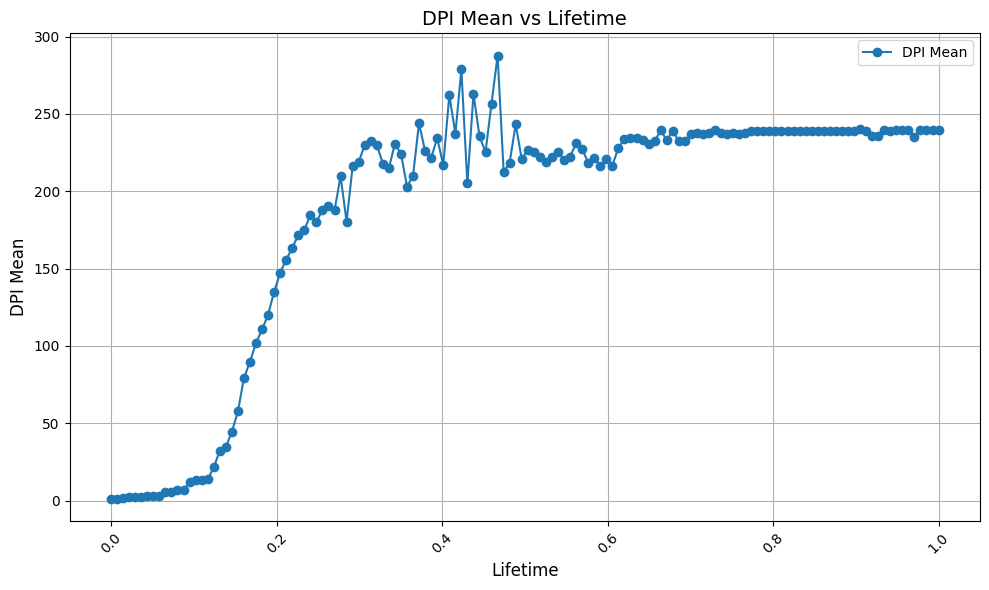

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(private_equity_bmk_1990[LIFE_TIME], private_equity_bmk_1990[DPI_PCT], marker='o', linestyle='-', label="DPI Mean")
plt.title("DPI Mean vs Lifetime", fontsize=14)
plt.xlabel("Lifetime", fontsize=12)
plt.ylabel("DPI Mean", fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Modeling

# Assumptions

* capital distributions pt to be strictly non-negative at any time t ∈ [0, Tl].
* the addition of a stochastic component that allows a certain degree of
irregularity in the cash outflows of private equity funds.

# Calculate Alpha

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def fund_multiple_model(t, alpha, m):
    return m * (1 - np.exp(-0.5 * alpha * t**2))

params, _ = curve_fit(fund_multiple_model, private_equity_bmk_1990[LIFE_TIME], private_equity_bmk_1990[M_t])
alpha, m = params
print("α:", alpha)
print("Multiple m:", m)
print("Time Step", len(private_equity_bmk_1990))

α: 40.463917093855905
Multiple m: 2.373660478001543
Time Step 138


# Stochastic model

In [ ]:
test_df = private_equity_bmk_1990[[LIFE_TIME, VOLATILITY, DISTRIBUTION_RATE, P_t, M_t, COMMITED_CAPITAL, DPI_MEAN]]
test_df = test_df.dropna()
test_df

,Lifetime,Volatility,Distribution Rate,P_t,M_t,CONSTITUENT SIZE (USD BN),DPI (%) MEAN
46652,0.007354,0.027258,-0.163906,22.717866,0.009394,1.47001,0.939440
46653,0.014547,0.044148,0.550081,15.776044,0.016284,0.94501,1.628419
46654,0.021821,0.045761,0.294000,36.303805,0.021850,1.72001,2.184987
46655,0.029174,0.040891,-0.103938,47.548344,0.019693,1.72001,1.969288
46656,0.036528,0.045287,0.183606,50.997649,0.023662,1.72001,2.366184
...,...,...,...,...,...,...,...
46784,0.970746,1.373709,-0.019010,920.359441,2.352449,9.25198,235.244851
46785,0.978019,1.362199,0.019010,911.622582,2.397596,9.14798,239.759648
46786,0.985293,1.362199,0.000000,911.622582,2.397596,9.14798,239.759648
46787,0.992646,1.362199,0.000000,911.622582,2.397596,9.14798,239.759648


In [ ]:
lifetime = test_df[LIFE_TIME].values
mu_t = test_df[DISTRIBUTION_RATE].values
sigma_t = test_df[VOLATILITY].values
C = test_df[COMMITED_CAPITAL]
dt = np.diff(lifetime, prepend=0)
P_sc = 'P_s'
test_df[P_sc] = test_df[DPI_MEAN]/100
P_s = test_df[P_sc].values

N = len(test_df)
# Initial Distribution Rate
p_s = 0

# Initialization
p_t = np.zeros(N)
p_t[0] = p_s

brownian_motion = np.cumsum(np.sqrt(dt) * np.random.normal(0, 1, N))

for i in range(1, N):
    t = lifetime[i]
    s = lifetime[i - 1]
    delta_t = t - s

    drift = mu_t[i] * (alpha * (t**2 - s**2) + sigma_t[i]**2 * delta_t)
    diffusion = sigma_t[i] * brownian_motion[i] * np.sqrt(delta_t)

    p_t[i] = alpha * t * (m - P_s[i - 1]) * np.exp(drift + diffusion)

    P_s[i] = P_s[i - 1] + p_t[i] * delta_t

test_df["Simulated_P_t"] = p_t

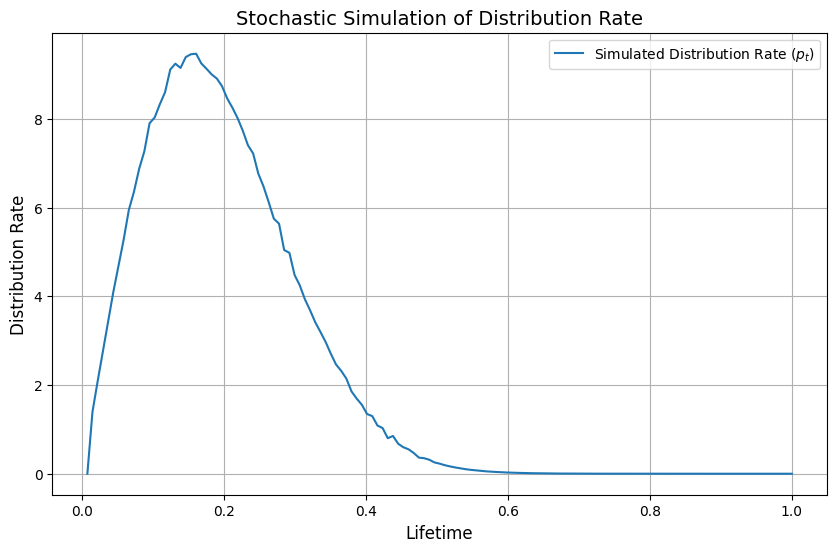

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(lifetime, p_t, label="Simulated Distribution Rate ($p_t$)")
plt.title("Stochastic Simulation of Distribution Rate", fontsize=14)
plt.xlabel("Lifetime", fontsize=12)
plt.ylabel("Distribution Rate", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Montecarlo Simulation

In [ ]:

num_simulations = 10000
simulation_results = np.zeros((num_simulations, N))

for sim in range(num_simulations):
    p_t = np.zeros(N)
    p_t[0] = p_s
    P_s_sim = P_s.copy()

    # Brownian motion
    brownian_motion = np.cumsum(np.sqrt(dt) * np.random.normal(0, 1, N))

    # Stochastic process
    for i in range(1, N):
        t = lifetime[i]
        s = lifetime[i - 1]
        delta_t = t - s

        drift = mu_t[i] * (alpha * (t**2 - s**2) + sigma_t[i]**2 * delta_t)
        diffusion = sigma_t[i] * brownian_motion[i] * np.sqrt(delta_t)

        p_t[i] = alpha * t * (m - P_s_sim[i - 1]) * np.exp(drift + diffusion)

        P_s_sim[i] = P_s_sim[i - 1] + p_t[i] * delta_t

    simulation_results[sim, :] = p_t


In [ ]:
mean_p_t = np.mean(simulation_results, axis=0)
std_p_t = np.std(simulation_results, axis=0)

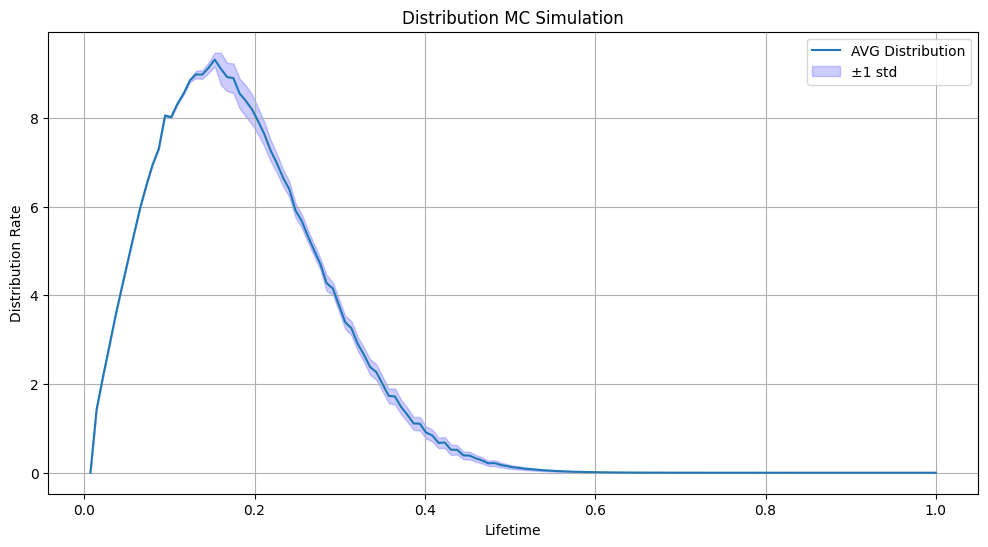

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(lifetime, mean_p_t, label='AVG Distribution')
plt.fill_between(lifetime, mean_p_t - std_p_t, mean_p_t + std_p_t, color='b', alpha=0.2, label='±1 std')
plt.title('Distribution MC Simulation')
plt.xlabel('Lifetime')
plt.ylabel('Distribution Rate')
plt.legend()
plt.grid(True)
plt.show()


# Cumulated Distribution

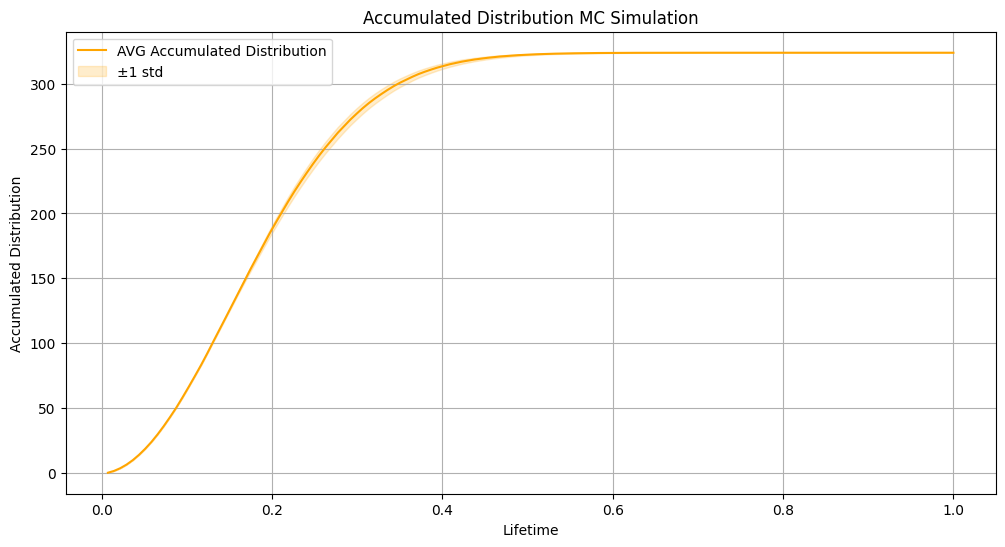

In [ ]:
accumulated_distributions = np.cumsum(simulation_results, axis=1)

mean_accumulated_distribution = np.mean(accumulated_distributions, axis=0)
std_accumulated_distribution = np.std(accumulated_distributions, axis=0)

plt.figure(figsize=(12, 6))
plt.plot(lifetime, mean_accumulated_distribution, label='AVG Accumulated Distribution', color='orange')
plt.fill_between(
    lifetime,
    mean_accumulated_distribution - std_accumulated_distribution,
    mean_accumulated_distribution + std_accumulated_distribution,
    color='orange',
    alpha=0.2,
    label='±1 std'
)
plt.title('Accumulated Distribution MC Simulation')
plt.xlabel('Lifetime')
plt.ylabel('Accumulated Distribution')
plt.legend()
plt.grid(True)
plt.show()
